In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from scipy import stats
import matplotlib
import cartopy
import cartopy.crs as ccrs
import pickle
import os.path
from cartopy.util import add_cyclic_point
import warnings
warnings.filterwarnings("ignore")

In [19]:
mymodels = ["ACCESS-ESM1-5", "CAMS-CSM1-0", "CESM2-WACCM", "CanESM5", "GFDL-ESM4", "HadGEM3-GC31-LL", "INM-CM5-0",\
            "MPI-ESM1-2-LR", "NorESM2-LM", "UKESM1-0-LL", "AWI-ESM-1-1-LR", "CAS-ESM2-0", "CMCC-ESM2", "E3SM-1-1",\
            "GISS-E2-1-G", "IITM-ESM", "IPSL-CM6A-LR", "MRI-ESM2-0", "SAM0-UNICON", "BCC-ESM1", "CESM2", \
            "CNRM-ESM2-1", "EC-Earth3", "GISS-E2-2-G", "INM-CM4-8", "MIROC-ES2L", "NESM3", "TaiESM1", "GFDL-ESM4"]
nmodel = len(mymodels)
lat = {}
lon = {}
lwu_C = {}
swu_C = {}
lwd_C = {}
swd_C = {}
sh_C = {}
lh_C = {}
clt_C = {}
lwu_4X = {}
swu_4X = {}
lwd_4X = {}
swd_4X = {}
sh_4X = {}
lh_4X = {}
clt_4X = {}

In [20]:
#Grab Control
datadir = "/net/aeolus/aura/hansingh/CMIP/piControl/processed/"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsus_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsus_piControl.nc", decode_times=False)
        swu_C[mymodels[i]]=np.array(myData.rsus[0,:,:].mean(axis=1))
        lat[mymodels[i]]=np.array(myData.lat)
    if os.path.exists(datadir+mymodels[i]+"_rsds_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsds_piControl.nc", decode_times=False)
        swd_C[mymodels[i]]=np.array(myData.rsds[0,:,:].mean(axis=1))
    if os.path.exists(datadir+mymodels[i]+"_rlus_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlus_piControl.nc", decode_times=False)
        lwu_C[mymodels[i]]=np.array(myData.rlus[0,:,:].mean(axis=1))
    if os.path.exists(datadir+mymodels[i]+"_rlds_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlds_piControl.nc", decode_times=False)
        lwd_C[mymodels[i]]=np.array(myData.rlds[0,:,:].mean(axis=1))
    if os.path.exists(datadir+mymodels[i]+"_hfss_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfss_piControl.nc", decode_times=False)
        sh_C[mymodels[i]]=np.array(myData.hfss[0,:,:].mean(axis=1))
    if os.path.exists(datadir+mymodels[i]+"_hfls_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfls_piControl.nc", decode_times=False)
        lh_C[mymodels[i]]=np.array(myData.hfls[0,:,:].mean(axis=1))
    if os.path.exists(datadir+mymodels[i]+"_clt_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_clt_piControl.nc", decode_times=False)
        clt_C[mymodels[i]]=np.array(myData.clt[0,:,:].mean(axis=1))
        
#Grab 4XCO2
yrstr = "yrs100-150"
datadir = "/net/aeolus/aura/hansingh/CMIP/abrupt4XCO2/processed/"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsus_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsus_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        swu_4X[mymodels[i]]=np.array(myData.rsus[0,:,:].mean(axis=1))
        lat[mymodels[i]]=np.array(myData.lat)
    if os.path.exists(datadir+mymodels[i]+"_rsds_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsds_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        swd_4X[mymodels[i]]=np.array(myData.rsds[0,:,:].mean(axis=1))
    if os.path.exists(datadir+mymodels[i]+"_rlus_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlus_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        lwu_4X[mymodels[i]]=np.array(myData.rlus[0,:,:].mean(axis=1))
    if os.path.exists(datadir+mymodels[i]+"_rlds_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlds_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        lwd_4X[mymodels[i]]=np.array(myData.rlds[0,:,:].mean(axis=1))
    if os.path.exists(datadir+mymodels[i]+"_hfss_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfss_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        sh_4X[mymodels[i]]=np.array(myData.hfss[0,:,:].mean(axis=1))
    if os.path.exists(datadir+mymodels[i]+"_hfls_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfls_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        lh_4X[mymodels[i]]=np.array(myData.hfls[0,:,:].mean(axis=1))
    if os.path.exists(datadir+mymodels[i]+"_clt_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_clt_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        clt_4X[mymodels[i]]=np.array(myData.clt[0,:,:].mean(axis=1))

Working on ACCESS-ESM1-5
Working on CAMS-CSM1-0
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on NorESM2-LM
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
Working on BCC-ESM1
Working on CESM2
Working on CNRM-ESM2-1
Working on EC-Earth3
Working on GISS-E2-2-G
Working on INM-CM4-8
Working on MIROC-ES2L
Working on NESM3
Working on TaiESM1
Working on GFDL-ESM4
Working on ACCESS-ESM1-5
Working on CAMS-CSM1-0
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on NorESM2-LM
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Worki

In [21]:
print(clt_4X["GFDL-ESM4"])

[90.57016  88.62788  84.25186  79.697075 77.295494 76.111725 75.35479
 75.36888  76.36605  77.834015 78.621216 78.747314 79.79451  79.7061
 78.972885 78.04244  77.165474 77.01418  77.69171  78.77333  80.22637
 82.17548  84.4492   86.62701  88.7256   90.54409  91.49587  91.721176
 91.488556 90.9606   90.28085  89.601036 88.85824  88.04398  87.24228
 86.26329  84.99672  83.837074 82.77051  81.70002  80.584885 79.36595
 78.11077  76.83613  75.62552  74.17153  72.483536 70.940186 69.19378
 67.25836  65.61464  63.946236 62.22798  60.433296 58.546616 56.68663
 55.02395  53.36049  51.79678  50.398132 49.345146 48.553753 47.874878
 47.40931  47.107212 47.151455 47.54628  48.21605  49.108616 50.245403
 51.622654 53.195133 54.72618  56.18213  57.60098  58.976448 60.204792
 61.22624  62.210476 63.284492 64.323425 65.39994  66.250595 66.83988
 67.22975  67.411194 67.36234  67.05141  66.717255 66.49971  66.85786
 67.69386  68.75711  69.57019  69.943146 69.74183  68.98493  67.80594
 66.45161  65.059

In [22]:
#Consolidate some fields
swnet_C = {}
lwnet_C = {}
sfcnet_C = {}
swnet_4X = {}
lwnet_4X = {}
sfcnet_4X = {}

for i in range(0,nmodel):
    if (mymodels[i] in swu_C)&(mymodels[i] in swd_C):
        swnet_C[mymodels[i]] = swd_C[mymodels[i]]-swu_C[mymodels[i]]
        if np.max(swnet_C[mymodels[i]])<0.: #Correct models with incorrect sign convention!!!
            swnet_C[mymodels[i]] = -1.*swnet_C[mymodels[i]]
        lwnet_C[mymodels[i]] = lwu_C[mymodels[i]]-lwd_C[mymodels[i]]
        sfcnet_C[mymodels[i]] = swnet_C[mymodels[i]]-lwnet_C[mymodels[i]]-sh_C[mymodels[i]]-lh_C[mymodels[i]]
    if (mymodels[i] in swu_4X)&(mymodels[i] in swd_4X):
        swnet_4X[mymodels[i]] = swd_4X[mymodels[i]]-swu_4X[mymodels[i]]
        if np.max(swnet_4X[mymodels[i]])<0.: #Correct models with incorrect sign convention!!!
            swnet_4X[mymodels[i]] = -1.*swnet_4X[mymodels[i]]
        lwnet_4X[mymodels[i]] = lwu_4X[mymodels[i]]-lwd_4X[mymodels[i]]
        sfcnet_4X[mymodels[i]] = swnet_4X[mymodels[i]]-lwnet_4X[mymodels[i]]-sh_4X[mymodels[i]]-lh_4X[mymodels[i]]

In [23]:
def PlotCMIP_ZL(LatDict, FieldDict, wantLabel, myTitle, myYlabel, **kwargs):
    Ymin = kwargs.get("Ymin", None)
    Ymax = kwargs.get("Ymax", None)
    Latmin = kwargs.get("Latmin", None)
    Latmax = kwargs.get("Latmax", None)
    latlocs = np.array([-90., -75., -60., -45., -30., -15., 0., 15., 30., 45., 60., 75., 90.])
    latlabels = ["90S", "75S", "60S", "45S", "30S", "15S", "Eq", "15N", "30N", "45N", "60N", "75N", "90N"]
    nfield = len(FieldDict)
    cmap = matplotlib.cm.get_cmap("viridis")
    newcolors = cmap(np.linspace(0,1.,nfield))
    newcmp = matplotlib.colors.ListedColormap(newcolors)
    nkey = len(FieldDict)
    i=0
    if wantLabel:
        for key in FieldDict:
            plt.plot(LatDict[key], FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=3.)
            i=i+1
    else:
        for key in FieldDict:
            plt.plot(LatDict[key], FieldDict[key], color=newcmp((i/nfield)+0.01), linewidth=3.)
            i=i+1
    lat_int = np.linspace(-90., 90., 181)
    field_int = np.zeros([nkey,181])
    j=0
    for key in FieldDict:
        field_int[j,:] = np.interp(lat_int, LatDict[key], FieldDict[key])
        j=j+1
    field_mean = np.mean(field_int, axis=0)
    plt.plot(lat_int, field_mean, color="black", label="MM Mean", linewidth=4.)
    plt.grid(b=True, which='both')
    plt.yticks(fontsize=16)
    plt.xticks(latlocs, latlabels, fontsize=16)
    plt.ylabel(myYlabel, fontsize=16)
    if wantLabel==1:
        plt.legend(fontsize=16, ncol=nfield)
    if wantLabel==2:
        plt.legend(fontsize=16, ncol=1)
    if wantLabel==3:
        plt.legend(fontsize=16, ncol=4)    
    plt.title(myTitle, fontsize=20)
    if Latmin:
        plt.xlim([Latmin, Latmax])
    else:
        plt.xlim([-90., 90.])
    if Ymin:
        plt.ylim([Ymin, Ymax])

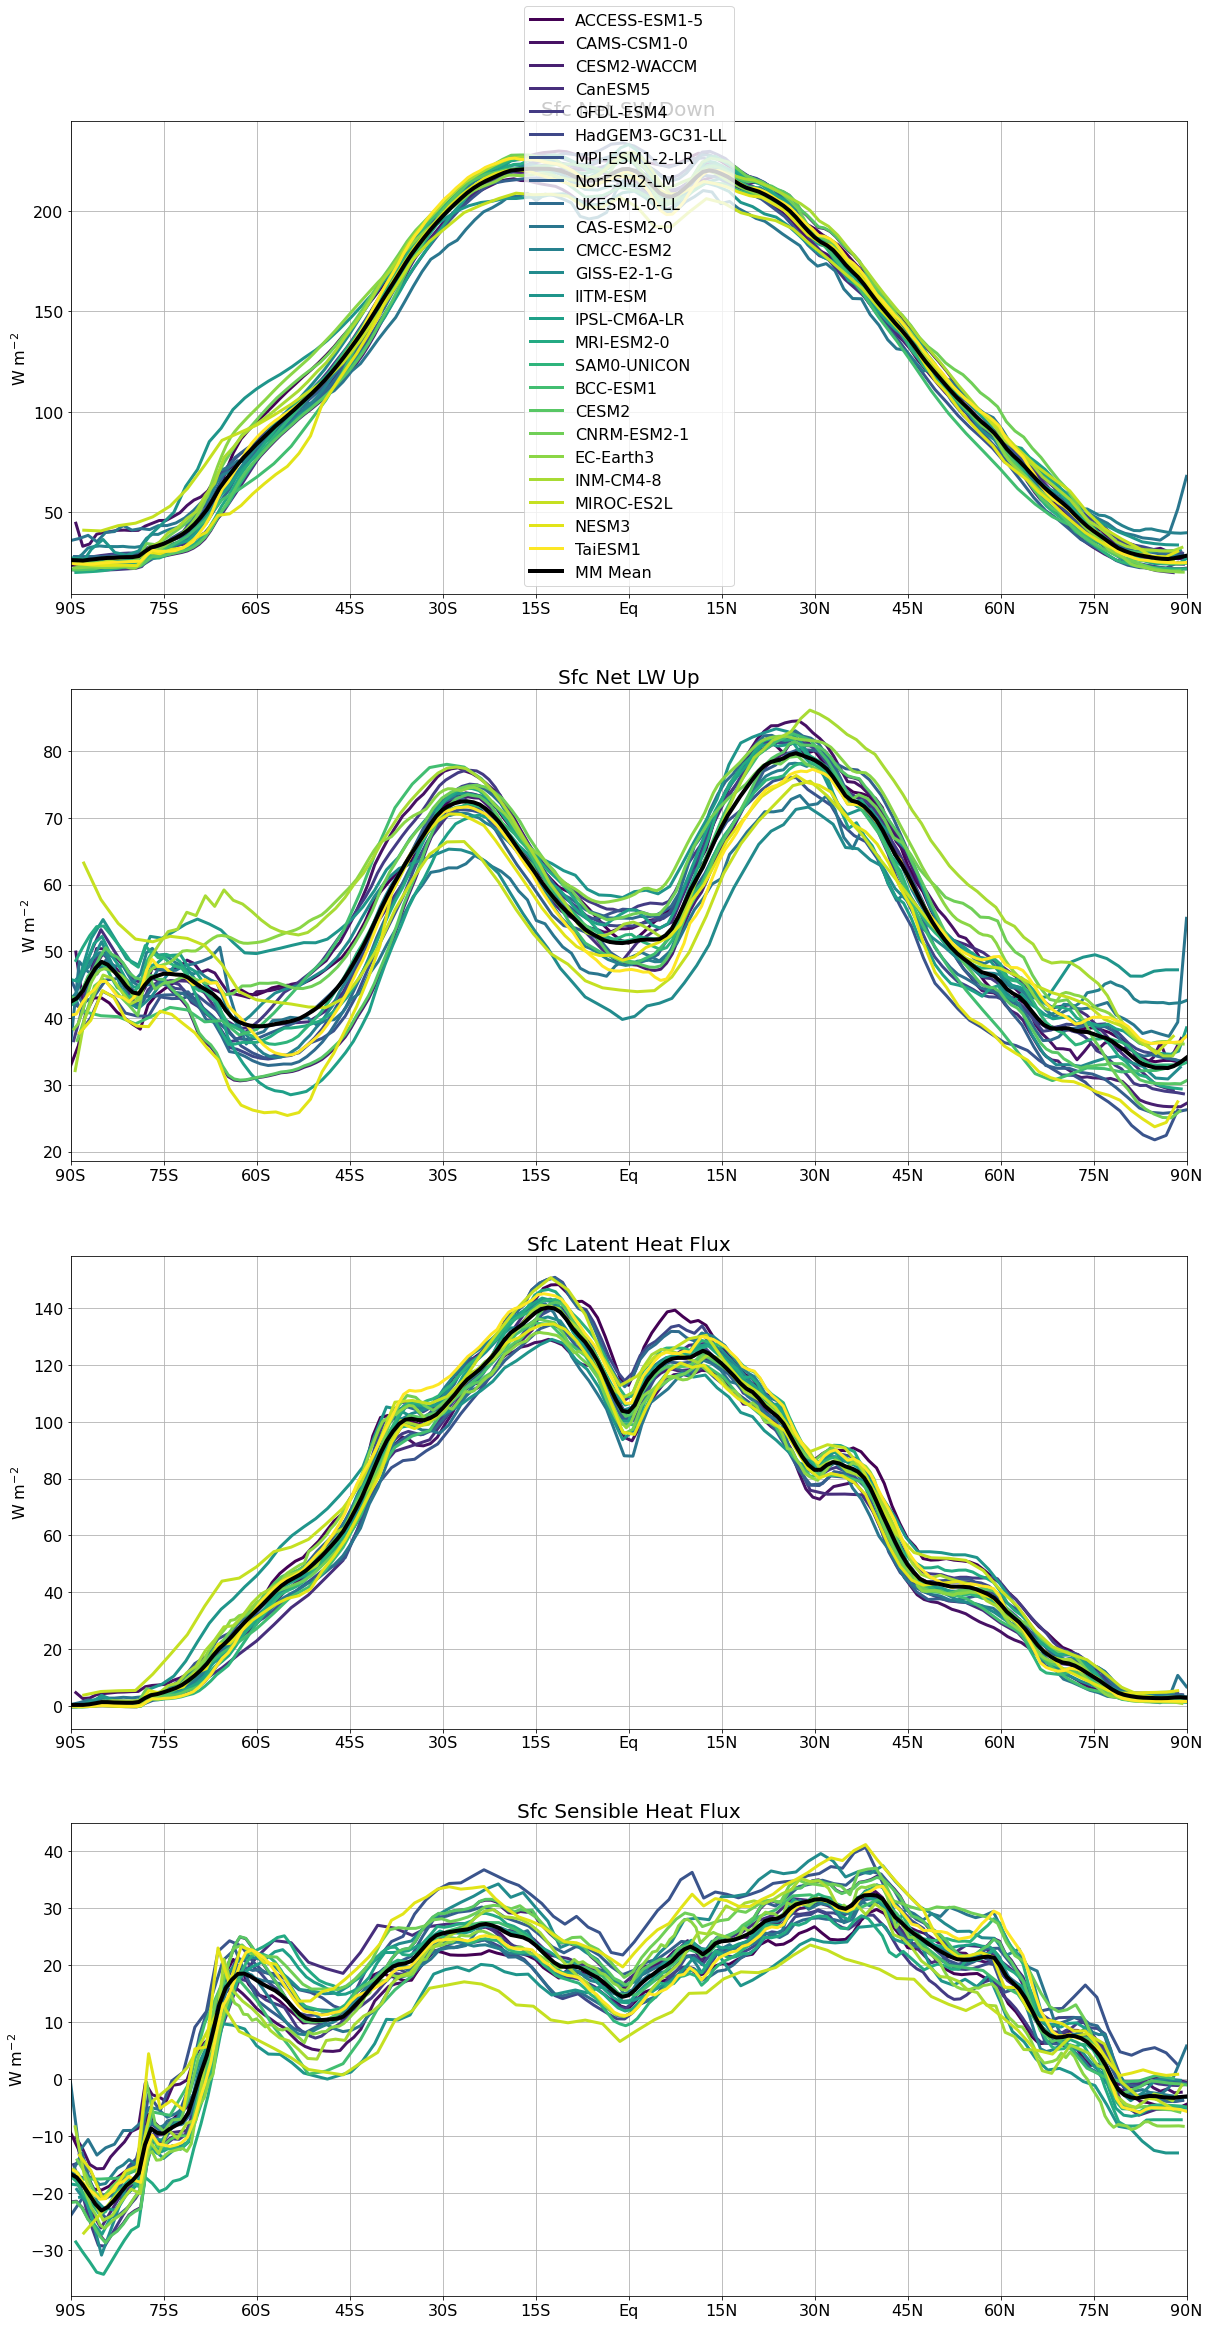

In [7]:
#Check fields!
fig = plt.figure(figsize=(20,40))
plt.subplot(4,1,1)
PlotCMIP_ZL(lat, swnet_C, 2, "Sfc Net SW Down", "W m$^{-2}$")
plt.subplot(4,1,2)
PlotCMIP_ZL(lat, lwnet_C, False, "Sfc Net LW Up", "W m$^{-2}$")
plt.subplot(4,1,3)
PlotCMIP_ZL(lat, lh_C, False, "Sfc Latent Heat Flux", "W m$^{-2}$")
plt.subplot(4,1,4)
PlotCMIP_ZL(lat, sh_C, False, "Sfc Sensible Heat Flux", "W m$^{-2}$")

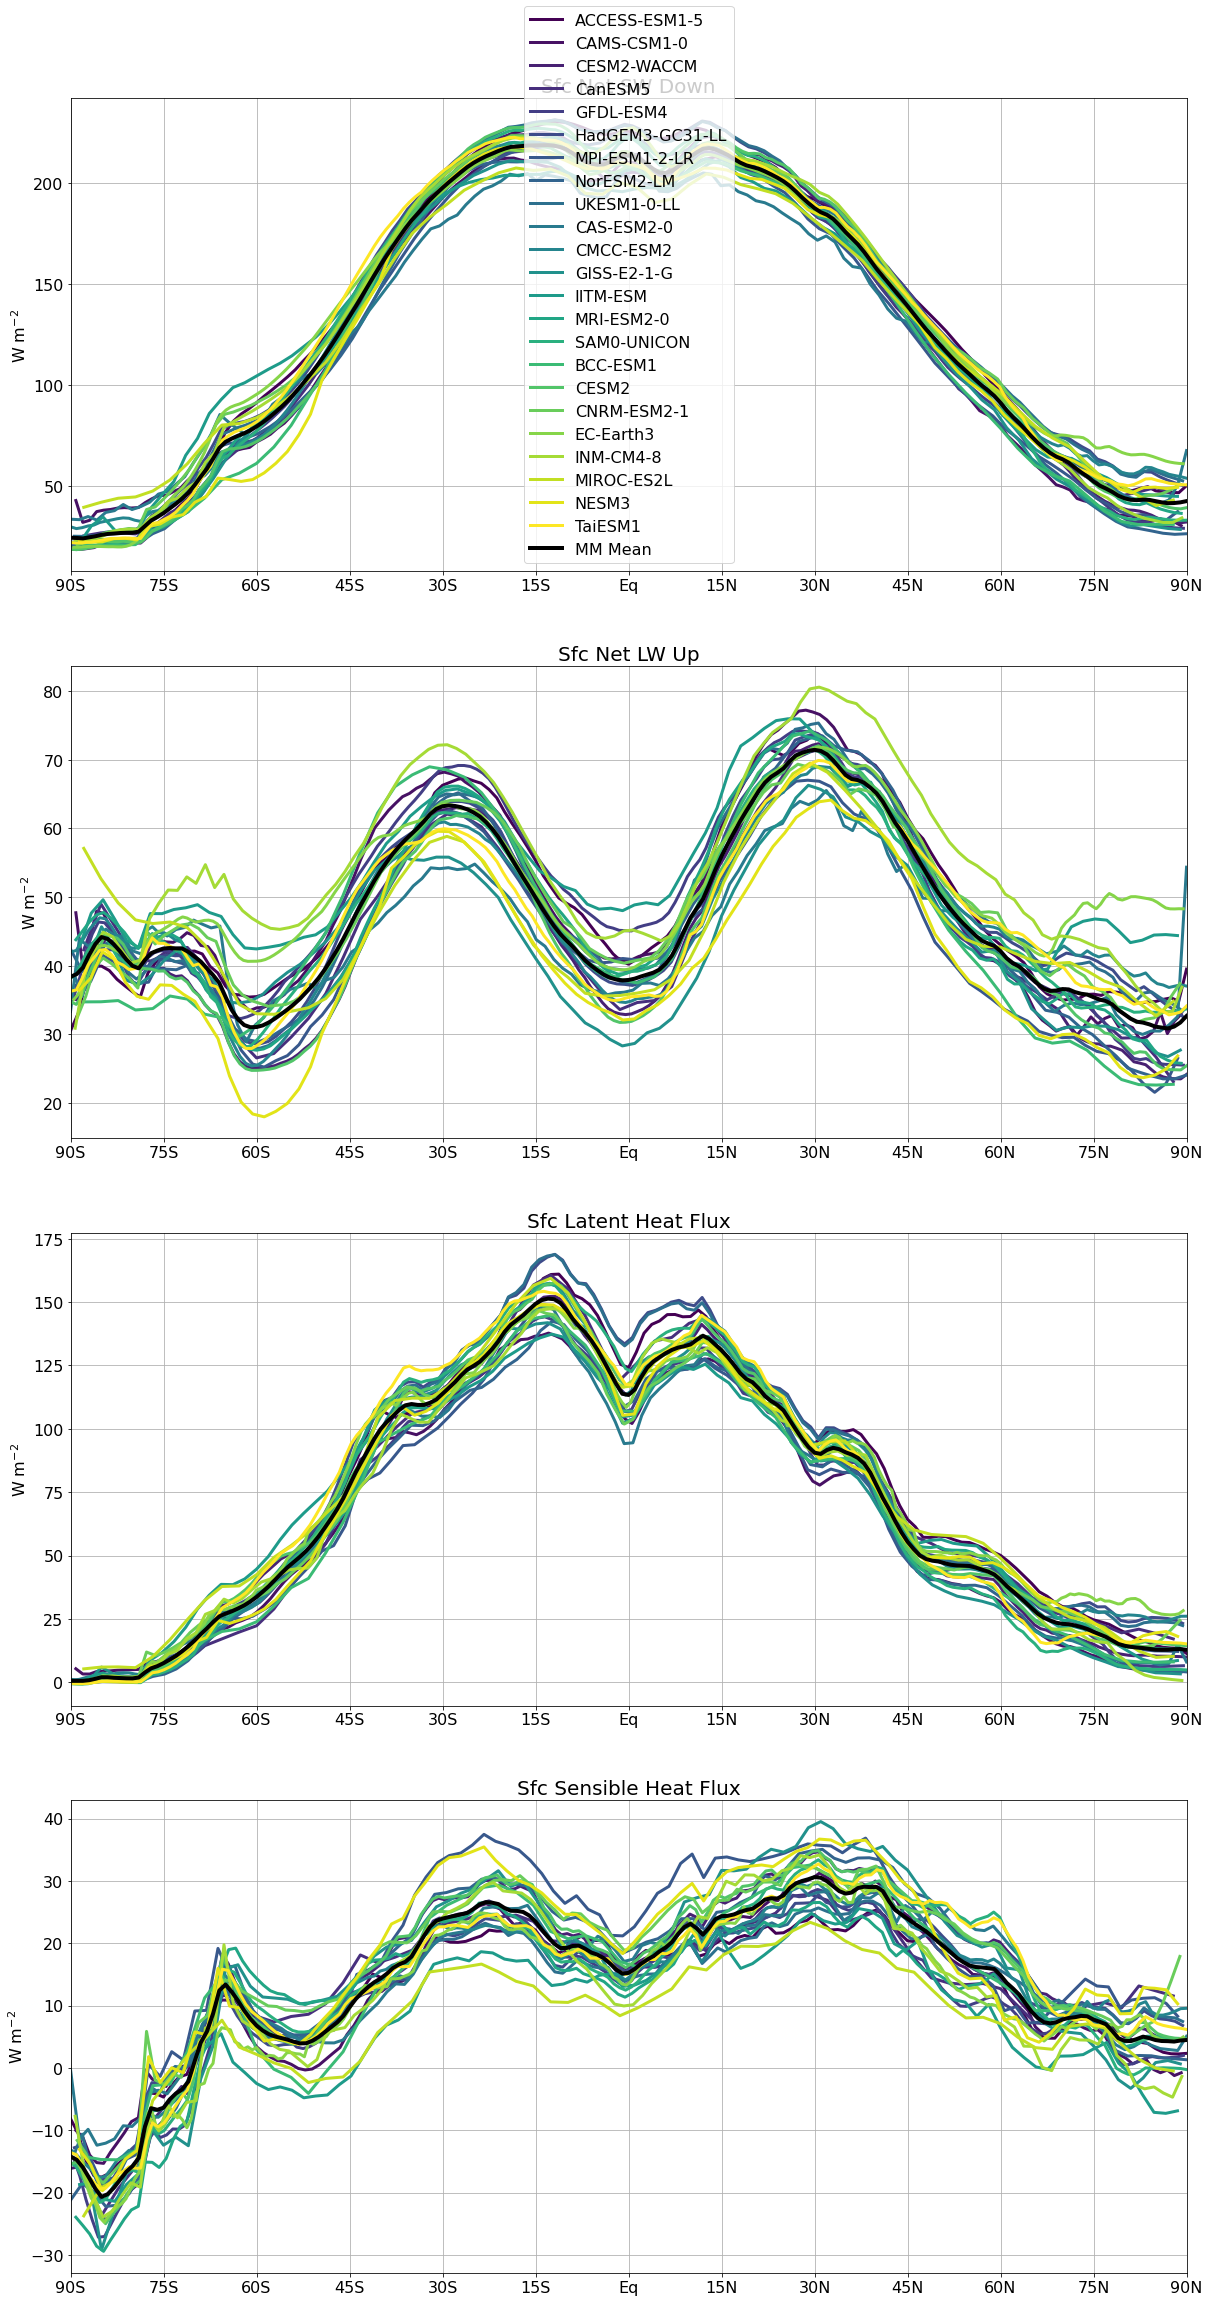

In [8]:
#repeat check for 4XCO2 fields
fig = plt.figure(figsize=(20,40))
plt.subplot(4,1,1)
PlotCMIP_ZL(lat, swnet_4X, 2, "Sfc Net SW Down", "W m$^{-2}$")
plt.subplot(4,1,2)
PlotCMIP_ZL(lat, lwnet_4X, False, "Sfc Net LW Up", "W m$^{-2}$")
plt.subplot(4,1,3)
PlotCMIP_ZL(lat, lh_4X, False, "Sfc Latent Heat Flux", "W m$^{-2}$")
plt.subplot(4,1,4)
PlotCMIP_ZL(lat, sh_4X, False, "Sfc Sensible Heat Flux", "W m$^{-2}$")

In [26]:
swnet_anom = {}
lwnet_anom = {}
sh_anom = {}
lh_anom = {}
sfcnet_anom = {}
netrad_anom = {}
netturb_anom = {}
clt_anom = {}

for i in range(0,nmodel):
    if (mymodels[i] in swnet_C)&(mymodels[i] in swnet_4X):
        swnet_anom[mymodels[i]] = swnet_4X[mymodels[i]]-swnet_C[mymodels[i]]
    if (mymodels[i] in lwnet_C)&(mymodels[i] in lwnet_4X):
        lwnet_anom[mymodels[i]] = -1.*(lwnet_4X[mymodels[i]]-lwnet_C[mymodels[i]])
    if (mymodels[i] in sh_C)&(mymodels[i] in sh_4X):
        sh_anom[mymodels[i]] = sh_4X[mymodels[i]]-sh_C[mymodels[i]]
    if (mymodels[i] in lh_C)&(mymodels[i] in lh_4X):
        lh_anom[mymodels[i]] = lh_4X[mymodels[i]]-lh_C[mymodels[i]]
    if (mymodels[i] in clt_C)&(mymodels[i] in clt_4X):
        clt_anom[mymodels[i]] = clt_4X[mymodels[i]]-clt_C[mymodels[i]]
    if (mymodels[i] in sfcnet_C)&(mymodels[i] in sfcnet_4X):
        sfcnet_anom[mymodels[i]] = sfcnet_4X[mymodels[i]]-sfcnet_C[mymodels[i]]
    if (mymodels[i] in swnet_anom)&(mymodels[i] in lwnet_anom):
        netrad_anom[mymodels[i]] = swnet_anom[mymodels[i]]+lwnet_anom[mymodels[i]]
    if (mymodels[i] in sh_anom)&(mymodels[i] in lh_anom):
        netturb_anom[mymodels[i]] = -1.*sh_anom[mymodels[i]]-lh_anom[mymodels[i]]

In [27]:
print(swnet_anom["EC-Earth3"])
print(lat["EC-Earth3"])

[-2.2068481e+00 -2.2026291e+00 -2.1937790e+00 -2.1831894e+00
 -2.1697769e+00 -2.1509323e+00 -2.1391373e+00 -2.1439438e+00
 -2.1701050e+00 -2.2082214e+00 -2.4199524e+00 -2.5377045e+00
 -2.2338715e+00 -9.7056580e-01  4.7736359e-01  1.5926437e+00
  2.2343903e+00  2.7144089e+00  3.0020065e+00  3.3673019e+00
  4.2052078e+00  6.1374664e+00  8.0951309e+00  9.3100357e+00
  9.6732407e+00  9.8421860e+00  1.0413055e+01  1.1059849e+01
  1.1571678e+01  1.1770485e+01  1.1738792e+01  1.1534512e+01
  1.1060921e+01  1.0037102e+01  7.7261963e+00  4.8885345e+00
  2.1033096e+00 -6.3751221e-02 -1.9170227e+00 -3.3580170e+00
 -4.4317017e+00 -5.2865295e+00 -6.0841904e+00 -6.7811737e+00
 -7.3843765e+00 -7.9144211e+00 -8.3201218e+00 -8.5632858e+00
 -8.6346588e+00 -8.5352554e+00 -8.1935196e+00 -7.7225571e+00
 -7.2125931e+00 -6.7413406e+00 -6.2529144e+00 -5.7438202e+00
 -5.2108459e+00 -4.6511078e+00 -4.0074158e+00 -3.3785095e+00
 -2.8465424e+00 -2.4730377e+00 -2.1951141e+00 -2.0447388e+00
 -1.9542847e+00 -1.81945

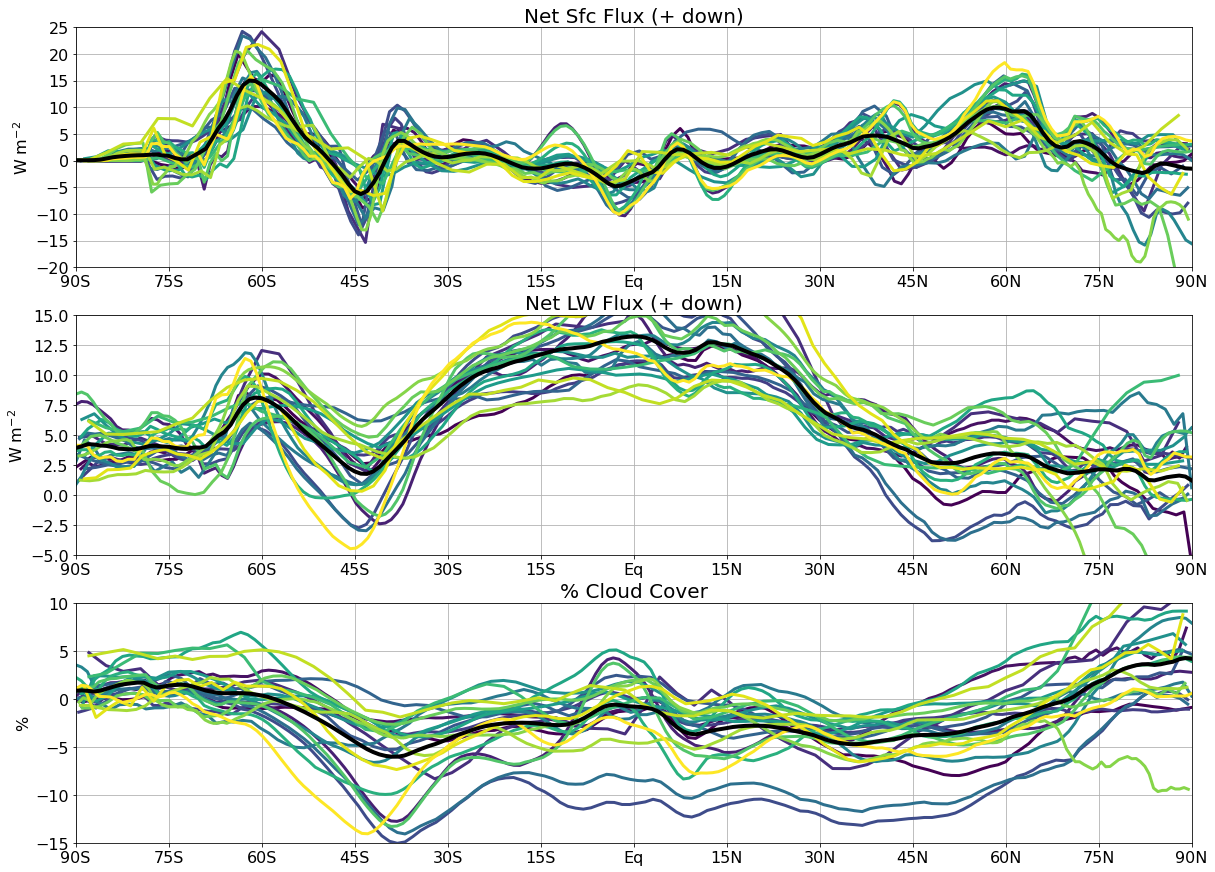

In [28]:
fig = plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, sfcnet_anom, False, "Net Sfc Flux (+ down)", "W m$^{-2}$", Ymin=-20., Ymax=25.)
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, lwnet_anom, False, "Net LW Flux (+ down)", "W m$^{-2}$", Ymin=-5., Ymax=15.)
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, clt_anom, False, "% Cloud Cover", "%", Ymin=-15., Ymax=10.)

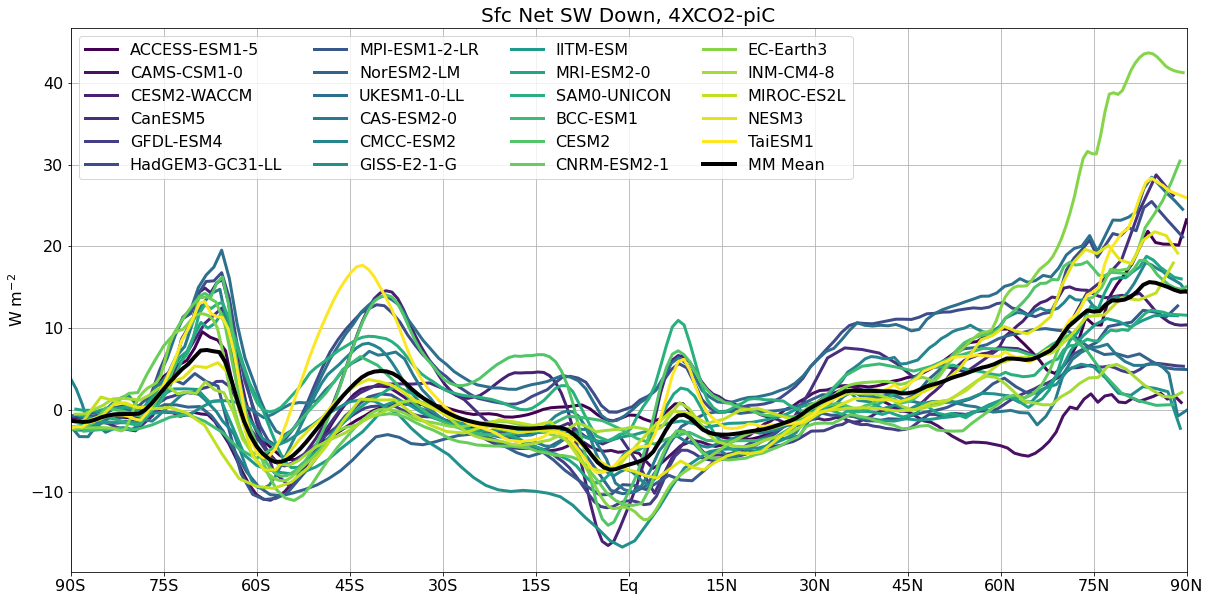

In [29]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, swnet_anom, 3, "Sfc Net SW Down, 4XCO2-piC", "W m$^{-2}$")

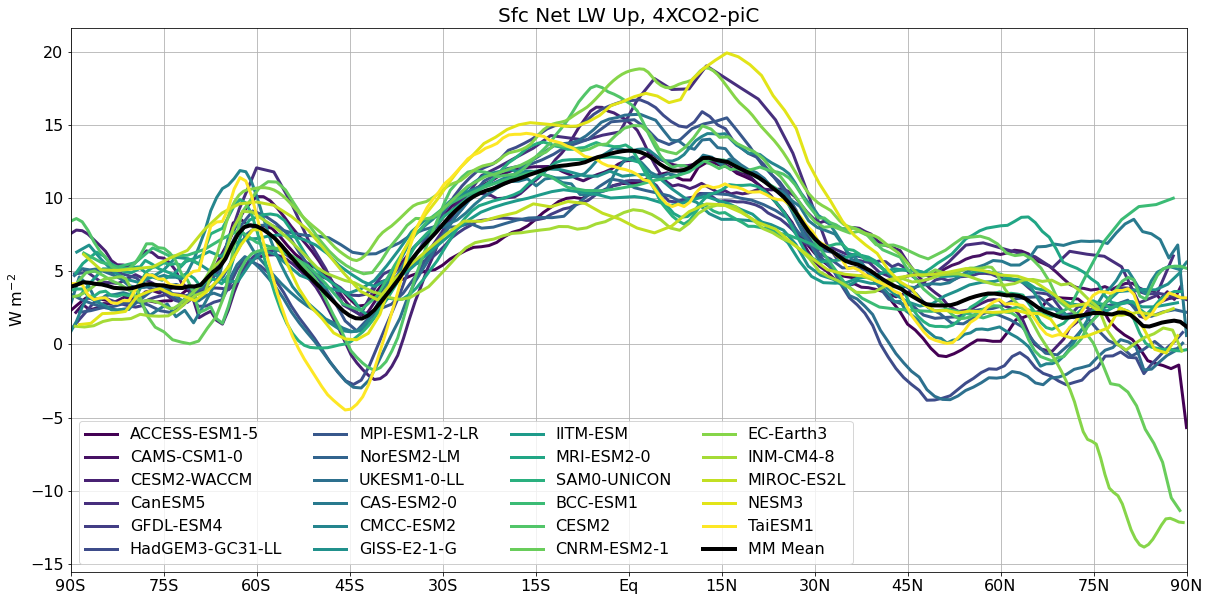

In [30]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, lwnet_anom, 3, "Sfc Net LW Up, 4XCO2-piC", "W m$^{-2}$")

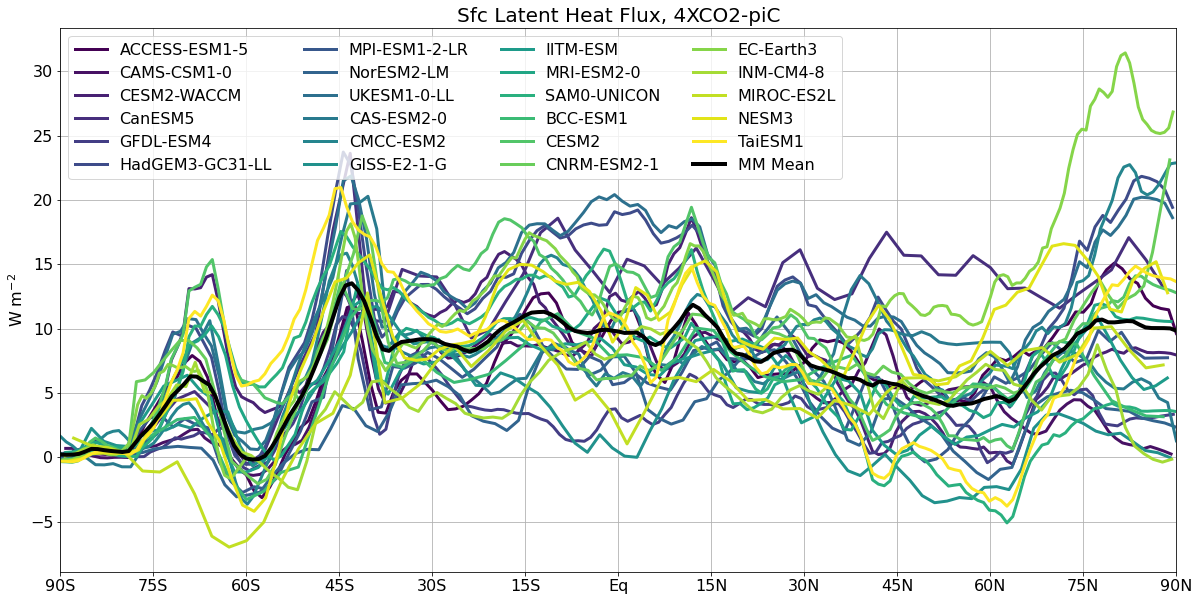

In [31]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, lh_anom, 3, "Sfc Latent Heat Flux, 4XCO2-piC", "W m$^{-2}$")

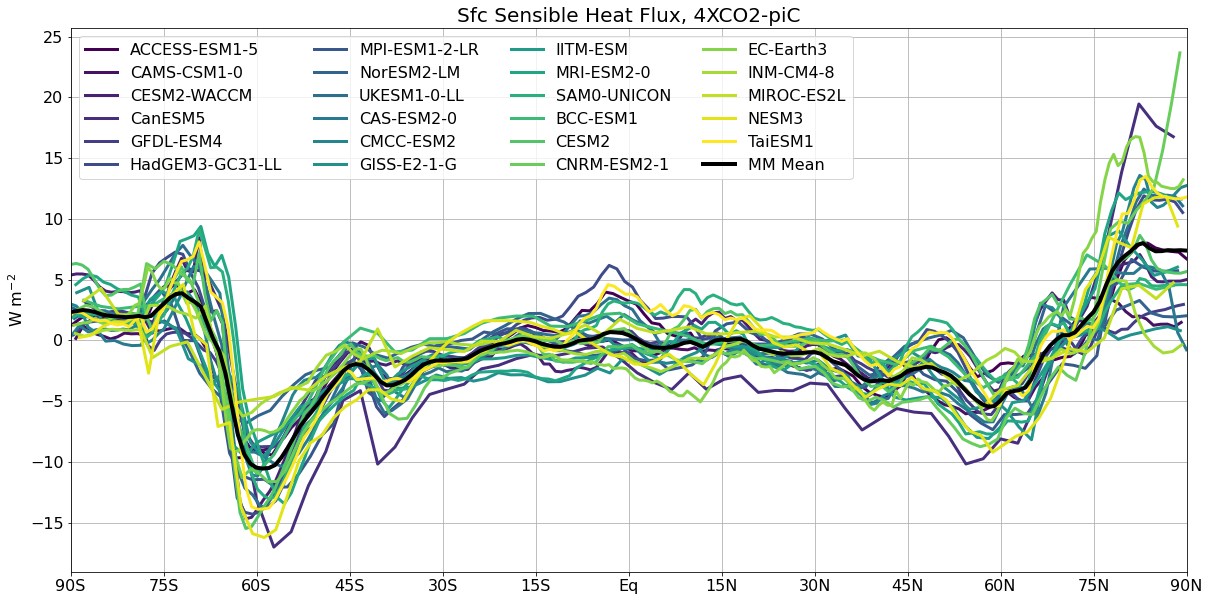

In [32]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, sh_anom, 3, "Sfc Sensible Heat Flux, 4XCO2-piC", "W m$^{-2}$")

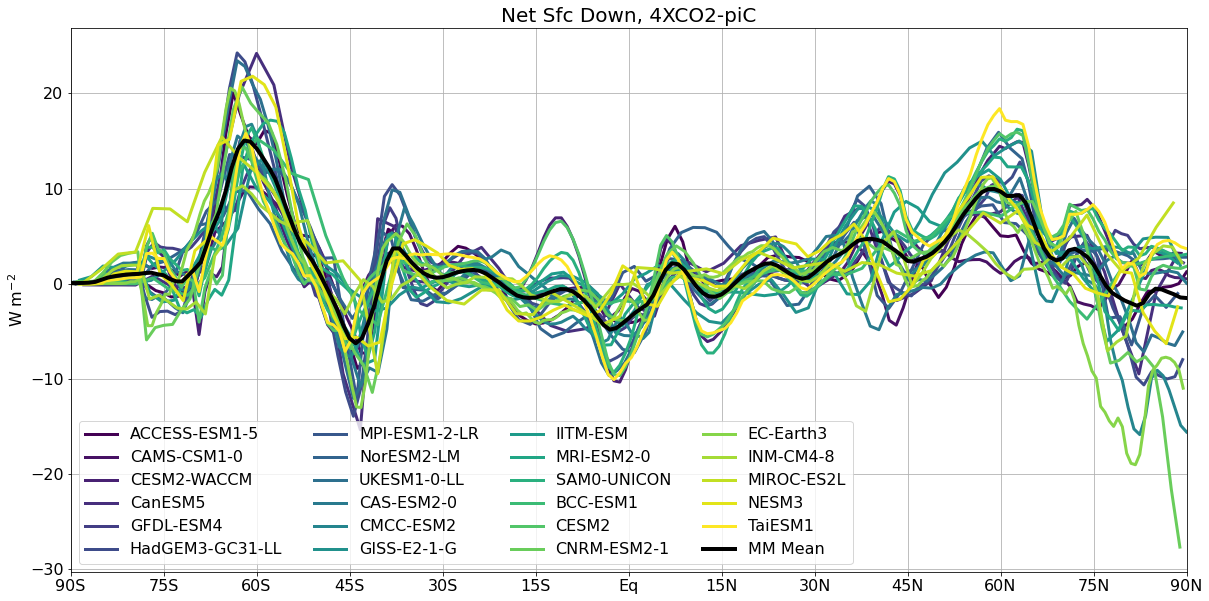

In [33]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, sfcnet_anom, 3, "Net Sfc Down, 4XCO2-piC", "W m$^{-2}$")

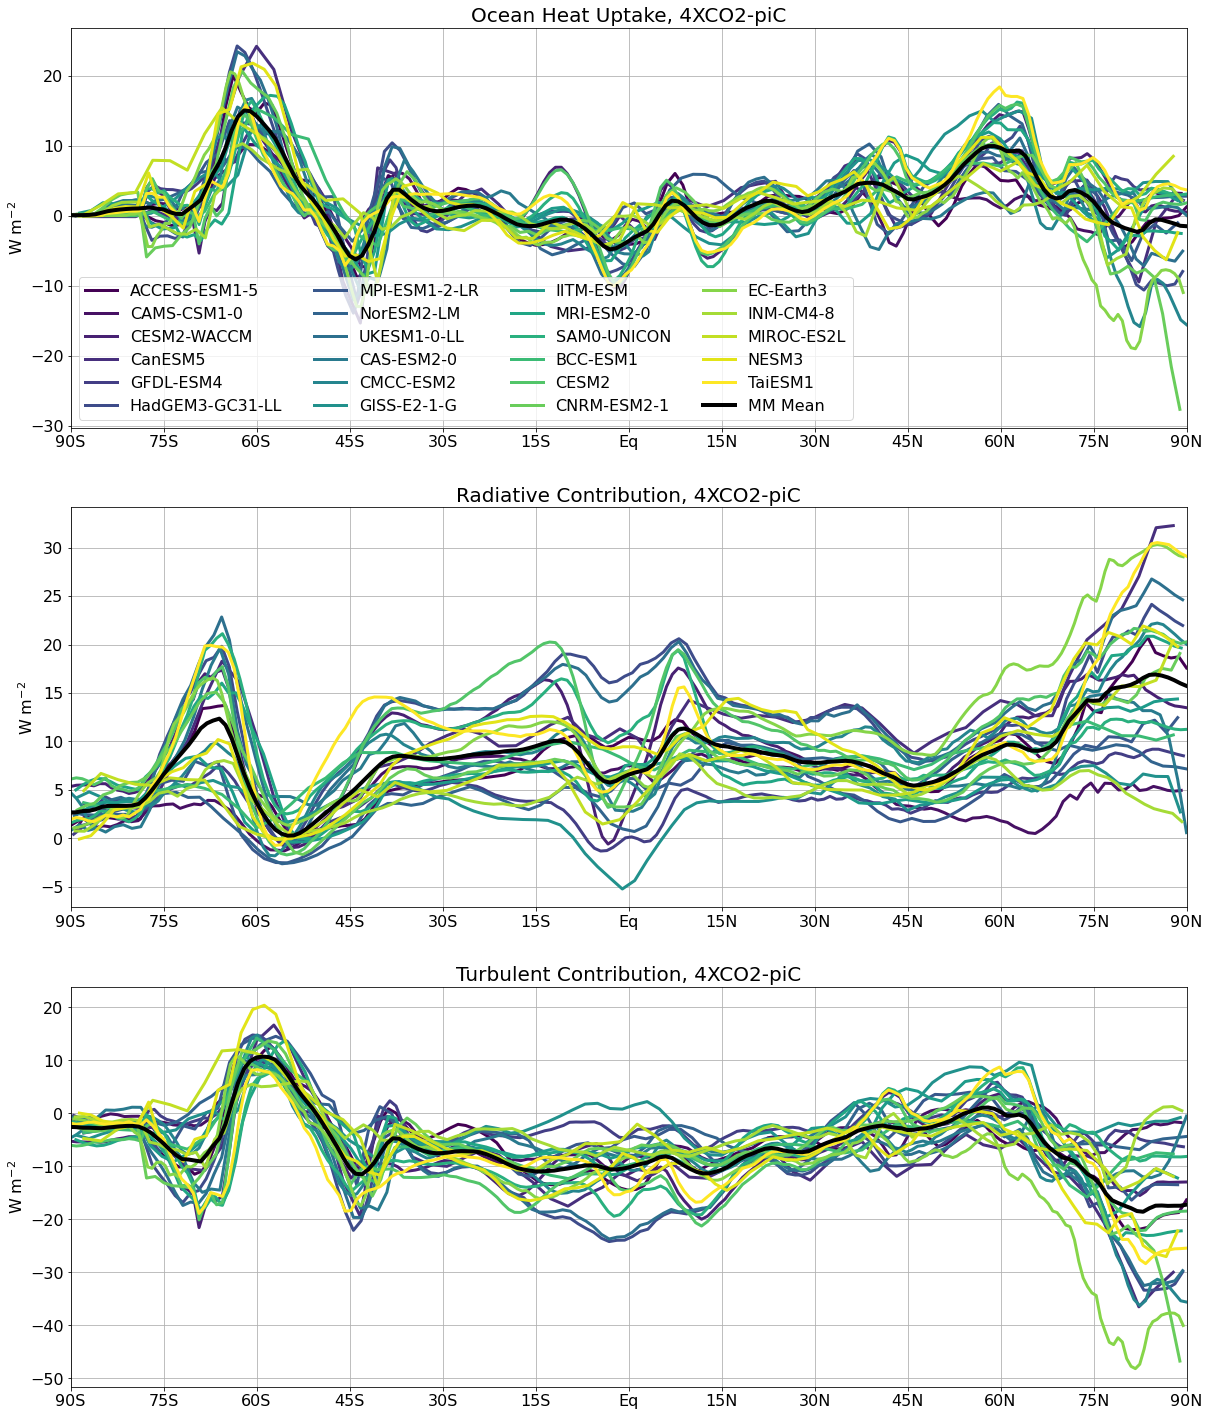

In [34]:
fig = plt.figure(figsize=(20,25))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, sfcnet_anom, 3, "Ocean Heat Uptake, 4XCO2-piC", "W m$^{-2}$")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, netrad_anom, False, "Radiative Contribution, 4XCO2-piC", "W m$^{-2}$")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, netturb_anom, False, "Turbulent Contribution, 4XCO2-piC", "W m$^{-2}$")
plt.savefig("/net/aeolus/aura/hansingh/Figs/OHU_CMIP6_Ab4XCO2_062021.pdf")

* Redo analysis with SS585 (because 4XCO2 is a gigantic forcing, and may skew the results!)
* Consider TOA fluxes!

In [56]:
#Grab TOA Fluxes
toaswd_C = {}
toaswu_C = {}
toalwu_C = {}
toaswd_4X = {}
toaswu_4X = {}
toalwu_4X = {}
#Grab Control
datadir = "/net/aeolus/aura/hansingh/CMIP/piControl/processed/"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsut_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsut_piControl.nc", decode_times=False)
        toaswu_C[mymodels[i]]=myData.rsut[0,:,:].mean(axis=1)
        lat[mymodels[i]]=myData.lat
    if os.path.exists(datadir+mymodels[i]+"_rsdt_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsdt_piControl.nc", decode_times=False)
        toaswd_C[mymodels[i]]=myData.rsdt[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlut_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlut_piControl.nc", decode_times=False)
        toalwu_C[mymodels[i]]=myData.rlut[0,:,:].mean(axis=1)
        
datadir = "/net/aeolus/aura/hansingh/CMIP/abrupt4XCO2/processed/"
yrstr = "yrs100-150"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsut_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsut_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        toaswu_4X[mymodels[i]]=myData.rsut[0,:,:].mean(axis=1)
        lat[mymodels[i]]=myData.lat
    if os.path.exists(datadir+mymodels[i]+"_rsdt_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsdt_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        toaswd_4X[mymodels[i]]=myData.rsdt[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlut_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlut_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        toalwu_4X[mymodels[i]]=myData.rlut[0,:,:].mean(axis=1)

Working on ACCESS-ESM1-5
Working on CAMS-CSM1-0
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on NorESM2-LM
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
Working on BCC-ESM1
Working on CESM2
Working on CNRM-ESM2-1
Working on EC-Earth3
Working on GISS-E2-2-G
Working on INM-CM4-8
Working on MIROC-ES2L
Working on NESM3
Working on TaiESM1
Working on ACCESS-ESM1-5
Working on CAMS-CSM1-0
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on NorESM2-LM
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Wo

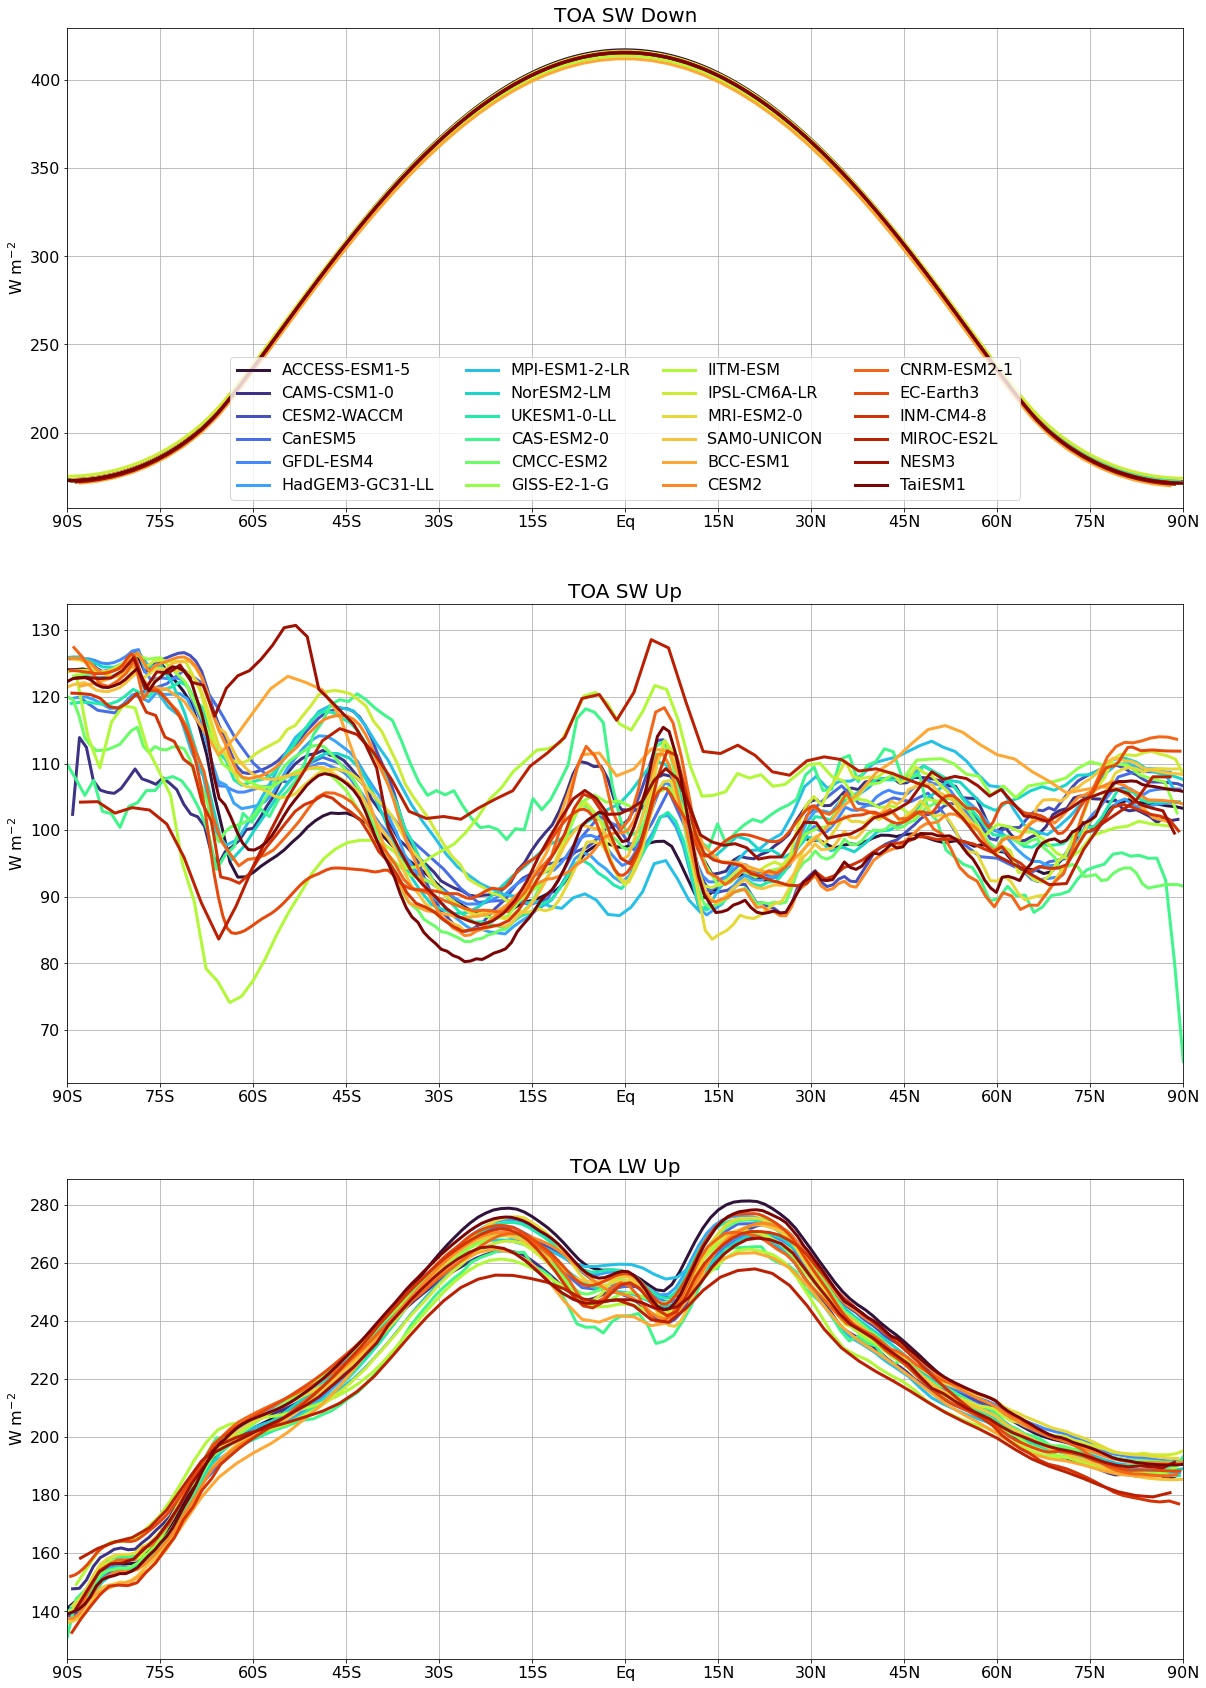

In [57]:
#Check fields!
fig = plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, toaswd_C, 3, "TOA SW Down", "W m$^{-2}$")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, toaswu_C, False, "TOA SW Up", "W m$^{-2}$")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, toalwu_C, False, "TOA LW Up", "W m$^{-2}$")

In [58]:
print(toaswd_4X)

{'ACCESS-ESM1-5': <xarray.DataArray 'rsdt' (lat: 145)>
array([173.33946, 173.42772, 173.69386, 174.13794, 174.76051, 175.56383,
       176.55055, 177.72473, 179.09288, 180.66014, 182.43275, 184.41844,
       186.6262 , 189.06761, 191.7566 , 194.70924, 197.94725, 201.50386,
       205.43513, 209.88728, 214.95393, 220.36403, 226.00032, 231.79393,
       237.6966 , 243.6722 , 249.69212, 255.73293, 261.7753 , 267.80264,
       273.80072, 279.75693, 285.66043, 291.50125, 297.27048, 302.96002,
       308.56268, 314.07147, 319.4802 , 324.7831 , 329.9747 , 335.05008,
       340.00443, 344.83328, 349.5325 , 354.09818, 358.52664, 362.81424,
       366.95776, 370.95407, 374.80014, 378.4932 , 382.03076, 385.41016,
       388.62912, 391.68552, 394.57712, 397.30203, 399.8586 , 402.2451 ,
       404.45975, 406.50143, 408.36868, 410.0603 , 411.57523, 412.91257,
       414.07132, 415.05112, 415.85092, 416.47037, 416.90915, 417.16696,
       417.24362, 417.13913, 416.8535 , 416.38675, 415.7396 , 414.912

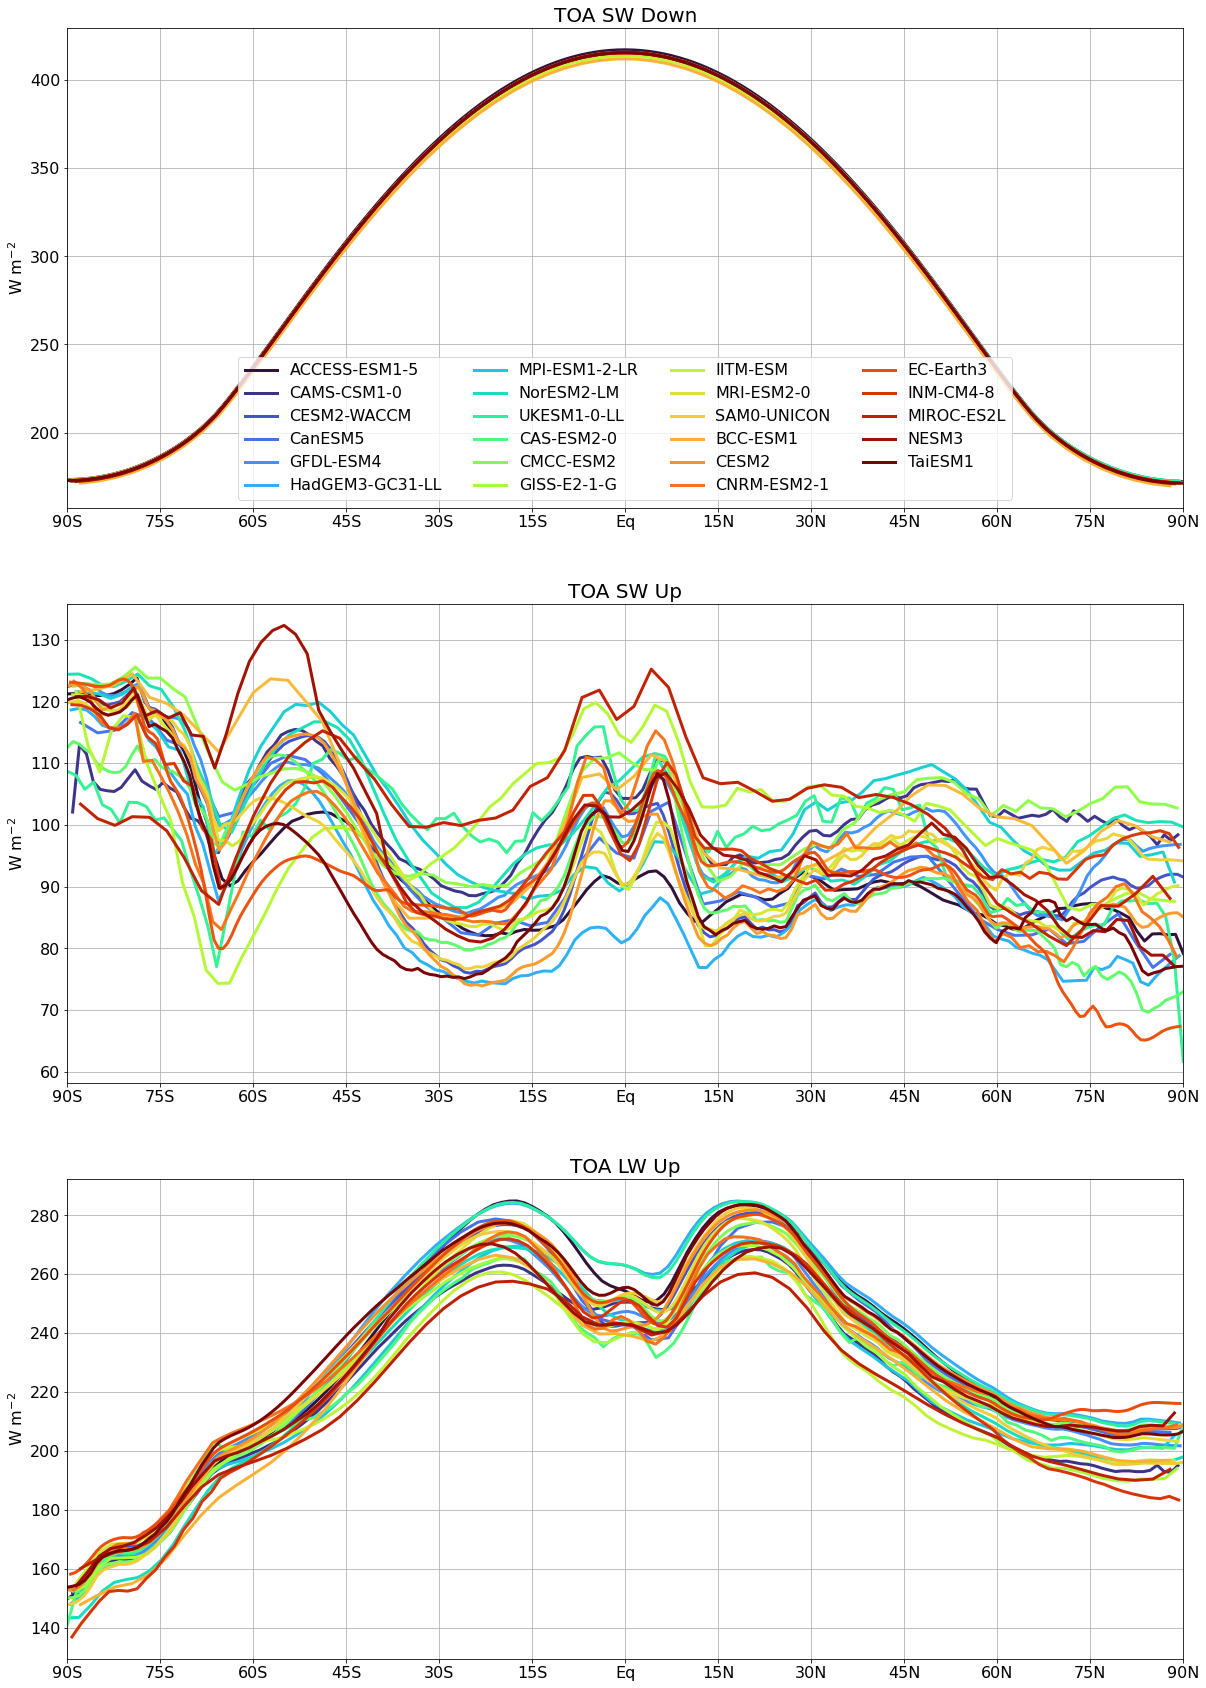

In [59]:
#Check fields!
fig = plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, toaswd_4X, 3, "TOA SW Down", "W m$^{-2}$")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, toaswu_4X, False, "TOA SW Up", "W m$^{-2}$")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, toalwu_4X, False, "TOA LW Up", "W m$^{-2}$")

In [63]:
OLR_C = toalwu_C
ASR_C = {}
OLR_4X = toalwu_4X
ASR_4X = {}
OLR_anom = {}
ASR_anom = {}

for i in range(0,nmodel):
    if (mymodels[i] in toaswu_C) and (mymodels[i] in toaswd_C):
        ASR_C[mymodels[i]] = toaswd_C[mymodels[i]]-toaswu_C[mymodels[i]]
    if (mymodels[i] in toaswu_4X) and (mymodels[i] in toaswd_4X):
        ASR_4X[mymodels[i]] = toaswd_4X[mymodels[i]]-toaswu_4X[mymodels[i]]
    if (mymodels[i] in ASR_C) and (mymodels[i] in ASR_4X):
        ASR_anom[mymodels[i]] = ASR_4X[mymodels[i]]-ASR_C[mymodels[i]]
    if (mymodels[i] in OLR_C) and (mymodels[i] in OLR_4X):
        OLR_anom[mymodels[i]] = OLR_4X[mymodels[i]]-OLR_C[mymodels[i]]

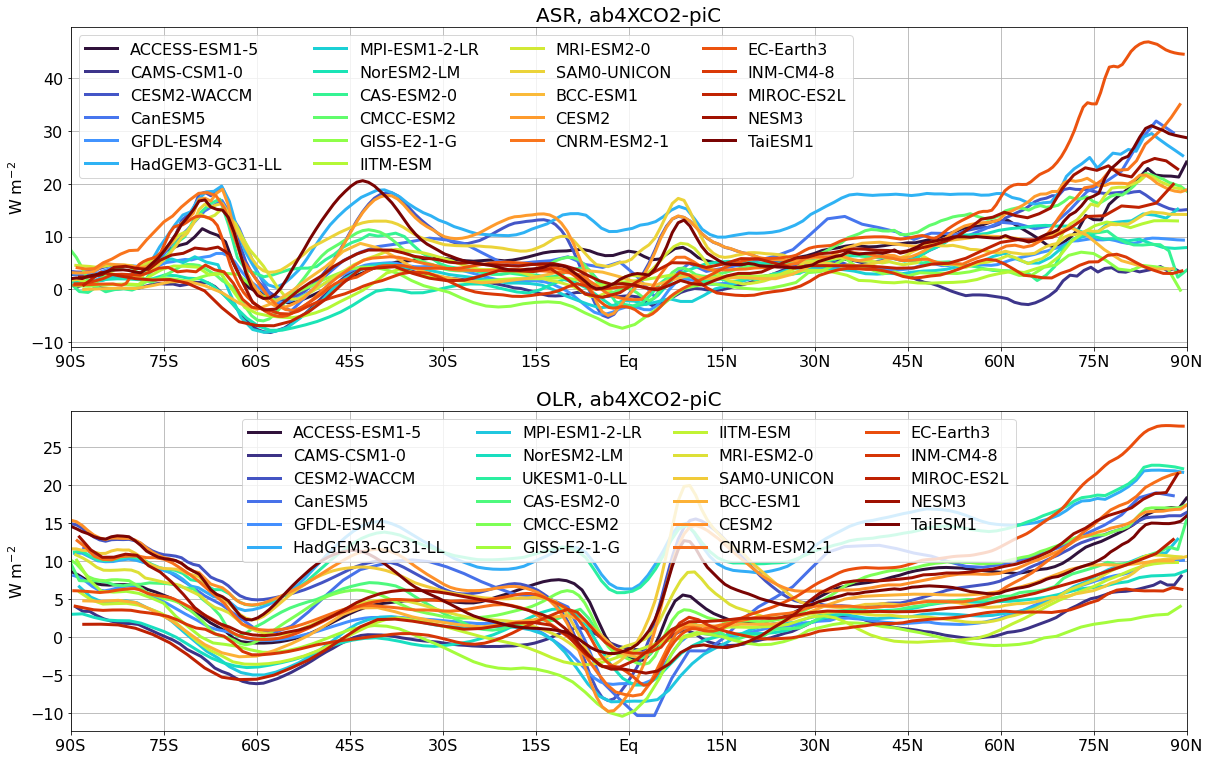

In [64]:
fig = plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, ASR_anom, 3, "ASR, ab4XCO2-piC", "W m$^{-2}$")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, OLR_anom, 3, "OLR, ab4XCO2-piC", "W m$^{-2}$")